In [48]:
import pandas as pd
import numpy as np 
from sklearn.utils import resample

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
    

In [49]:
network_data = pd.read_csv("DDos.pcap_ISCX.csv")   

In [50]:
network_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [51]:
network_data.describe().T

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,225745.0,8.879619e+03,1.975465e+04,0.0,80.0,80.0,80.0,65532.0
Flow Duration,225745.0,1.624165e+07,3.152437e+07,-1.0,71180.0,1452333.0,8805237.0,119999937.0
Total Fwd Packets,225745.0,4.874916e+00,1.542287e+01,1.0,2.0,3.0,5.0,1932.0
Total Backward Packets,225745.0,4.572775e+00,2.175536e+01,0.0,1.0,4.0,5.0,2942.0
Total Length of Fwd Packets,225745.0,9.394633e+02,3.249403e+03,0.0,26.0,30.0,63.0,183012.0
...,...,...,...,...,...,...,...,...
Active Min,225745.0,1.776201e+05,7.842602e+05,0.0,0.0,0.0,1862.0,100000000.0
Idle Mean,225745.0,1.032214e+07,2.185303e+07,0.0,0.0,0.0,8239725.0,120000000.0
Idle Std,225745.0,3.611943e+06,1.275689e+07,0.0,0.0,0.0,0.0,65300000.0
Idle Max,225745.0,1.287813e+07,2.692126e+07,0.0,0.0,0.0,8253838.0,120000000.0


In [52]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

C:\Users\Admin\AppData\Local\Temp\ipykernel_9496\2940031939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=network_data, x=' Label', palette='coolwarm')


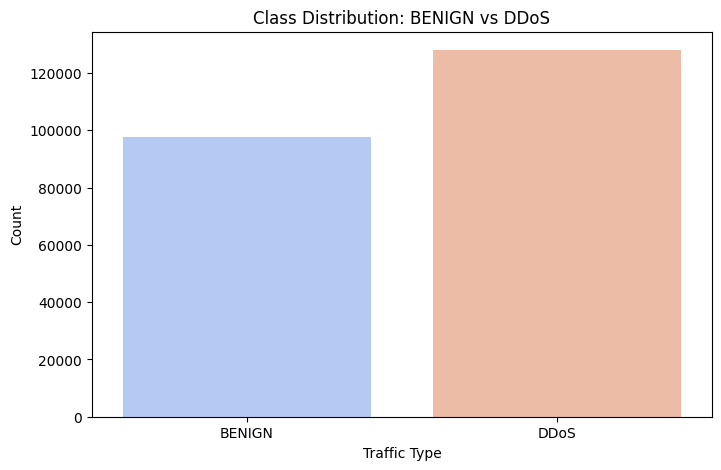

In [53]:
#
plt.figure(figsize=(8, 5))
sns.countplot(data=network_data, x=' Label', palette='coolwarm')
plt.title('Class Distribution: BENIGN vs DDoS')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()


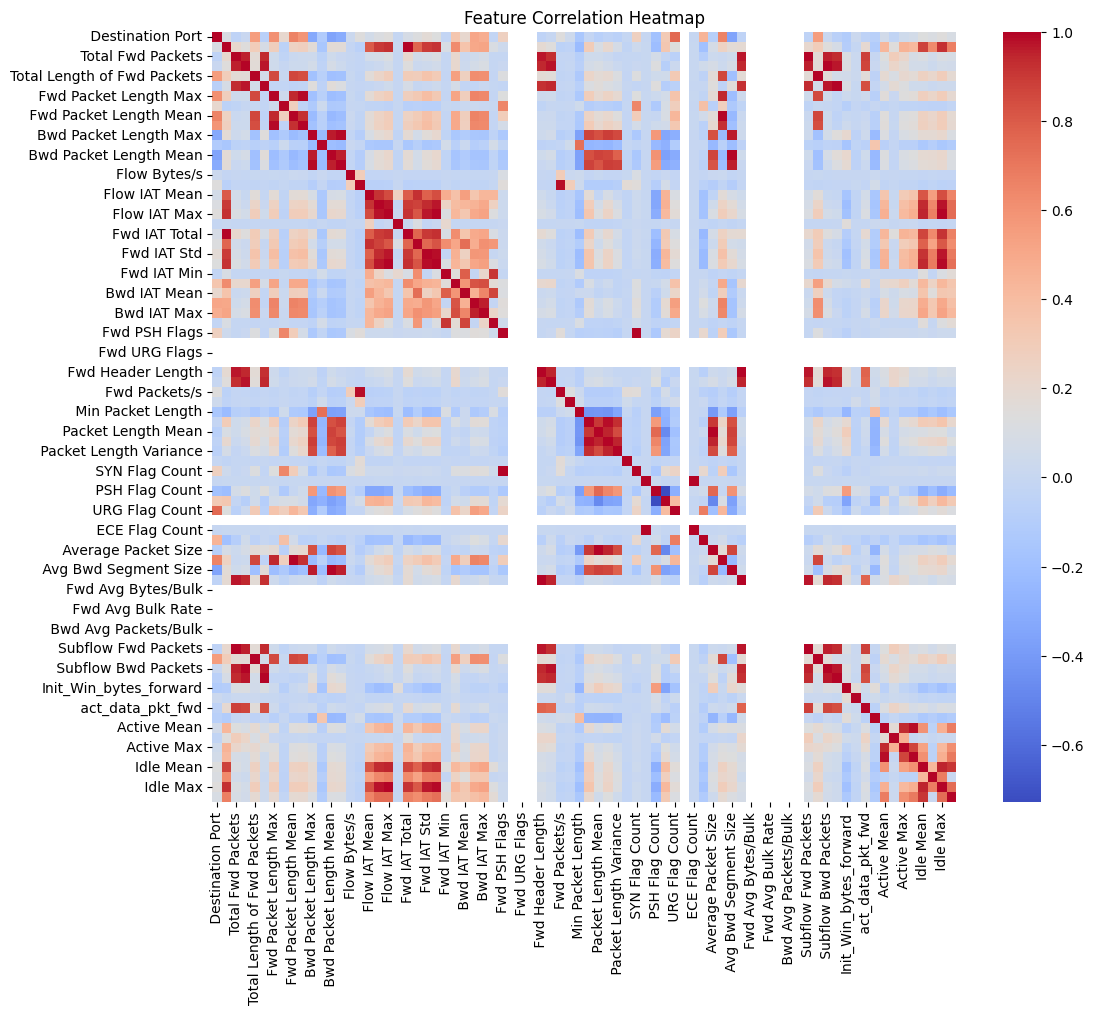

In [54]:
# 2. Correlation Heatmap (for numeric features only)
plt.figure(figsize=(12, 10))
correlation_matrix = network_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [55]:
# Display all column names for inspection
print(network_data.columns.tolist())

# Standardize column names by stripping leading/trailing spaces
network_data.columns = network_data.columns.str.strip()

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [56]:
# Updated Plot Code
key_features = ['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets']  # Use correct names

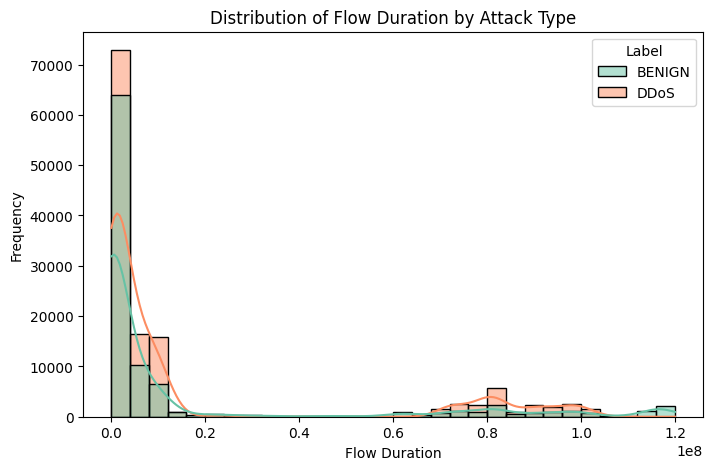

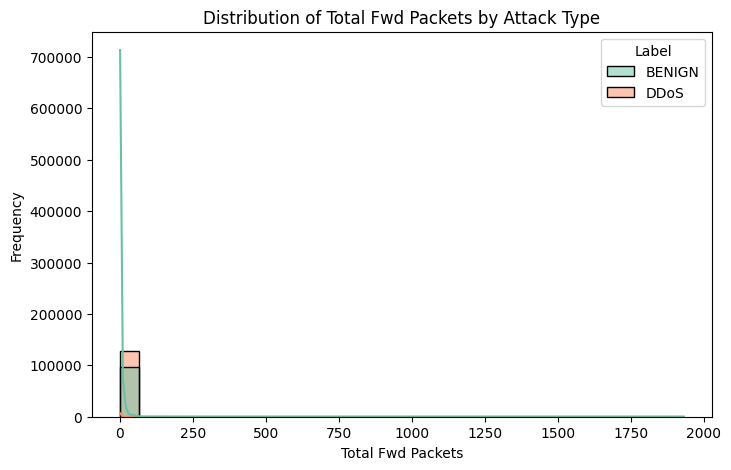

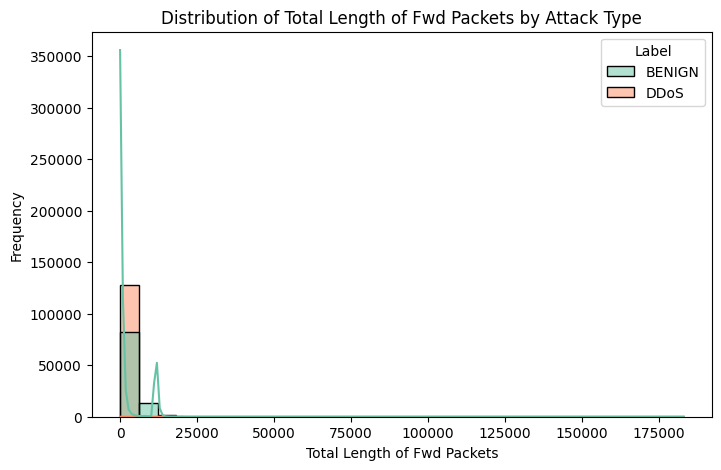

In [57]:
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=network_data, x=feature, hue='Label', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribution of {feature} by Attack Type')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

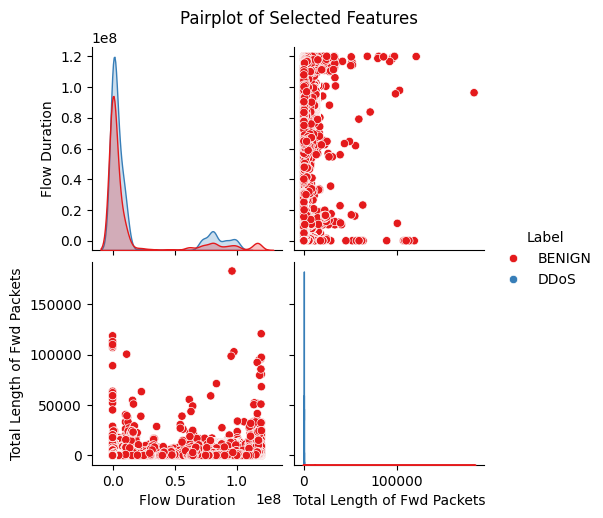

In [58]:
# Select a subset of numeric columns for visualization
selected_features = ['Flow Duration', 'Total Length of Fwd Packets', 'Label']
sns.pairplot(network_data[selected_features], hue='Label', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9496\1832828205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=network_data, x='Label', y='Flow Duration', palette='muted')


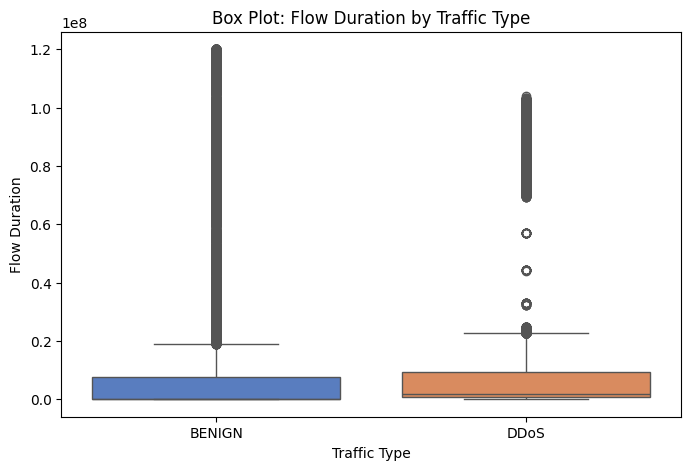

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=network_data, x='Label', y='Flow Duration', palette='muted')
plt.title('Box Plot: Flow Duration by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Flow Duration')
plt.show()


In [60]:
# Separate features and target
X = network_data.drop(columns=['Label'])
y = network_data['Label']

# Combine features and target
data_combined = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority = data_combined[data_combined['Label'] == 'DDoS']
minority = data_combined[data_combined['Label'] == 'BENIGN']

# Oversample the minority class
minority_oversampled = resample(minority, 
                                replace=True,  # Sample with replacement
                                n_samples=len(majority),  # Match majority size
                                random_state=42)

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([majority, minority_oversampled])

# Check the new class distribution
print(balanced_data['Label'].value_counts())

# Update features and target
X = balanced_data.drop(columns=['Label'])
y = balanced_data['Label']


Label
DDoS      128027
BENIGN    128027
Name: count, dtype: int64


In [61]:
balanced_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,20,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,DDoS
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104207,64087,23820316,1,5,1375,24,1375,1375,1375.000000,0.000000,...,20,21005.0,0.0,21005,21005,23800000.0,0.0,23800000,23800000,BENIGN
87339,62934,81834513,5,9,11613,62,11595,0,2322.600000,5183.429830,...,20,26836.0,0.0,26836,26836,40300000.0,42700000.0,70500000,10100000,BENIGN
13504,53,190,2,2,46,46,23,23,23.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
200068,53,235,2,2,88,188,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [62]:
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaNs with column means
X.fillna(X.mean(), inplace=True)

# Clip large values (optional, for extremely large values)
X = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)


In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'BENIGN': 0, 'DDoS': 1}


In [64]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y)

In [65]:
# Define parameter grids for each model
param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
}

In [66]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}


In [67]:
# Hyperparameter tuning with GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="f1", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    

    # Save the best model and its parameters
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print("-" * 50)     

Tuning Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
--------------------------------------------------
Tuning Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
--------------------------------------------------
Tuning XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [13:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
--------------------------------------------------


In [68]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Performance after Tuning:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}")
    print("-" * 30)

Decision Tree Performance after Tuning:
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999
------------------------------
Random Forest Performance after Tuning:
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999
------------------------------
XGBoost Performance after Tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------


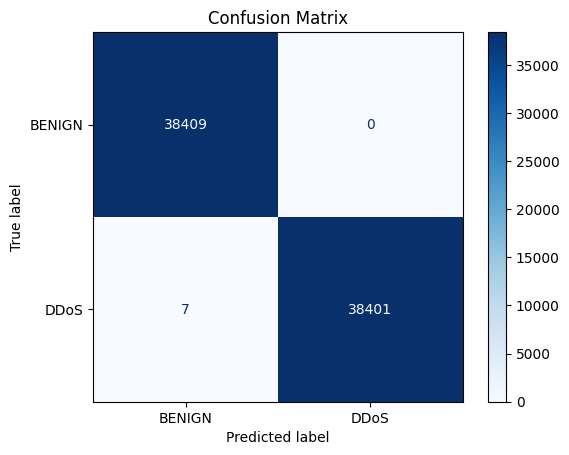

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for Random Forest model predictions
y_pred = best_models['Random Forest'].predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


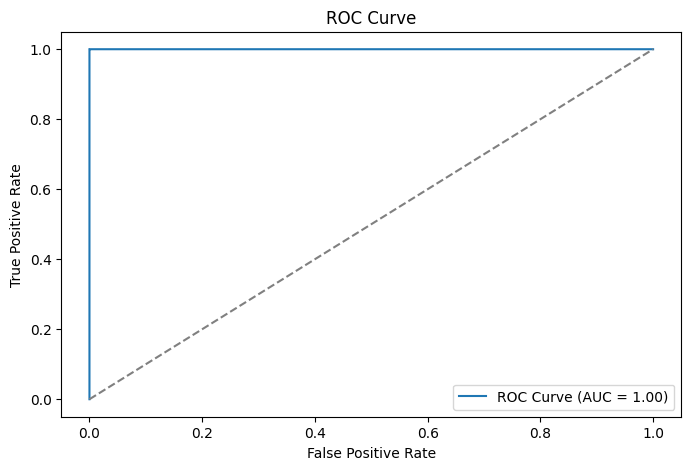

In [79]:
from sklearn.metrics import roc_curve, auc

# Example: Random Forest ROC curve
y_pred_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random chance line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9496\3645644675.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


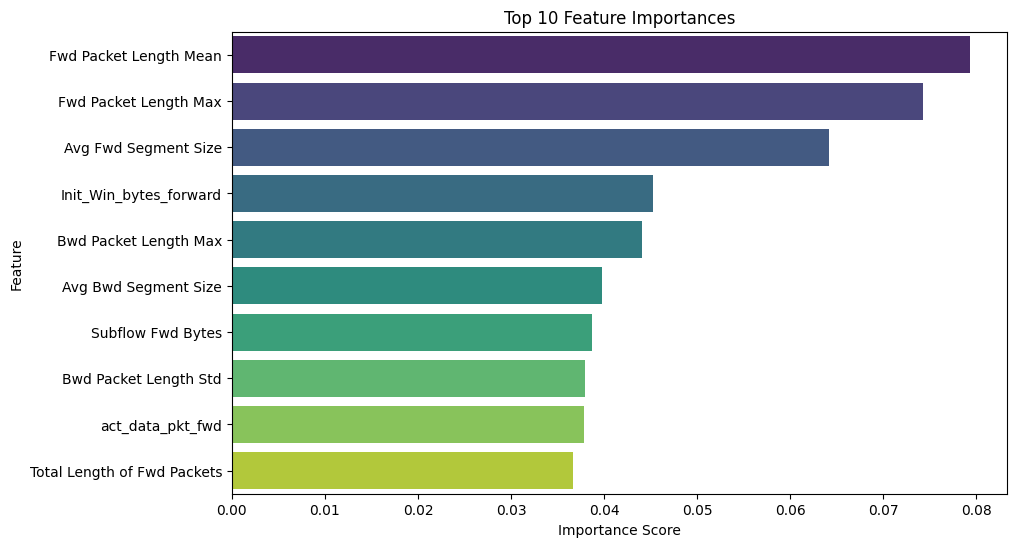

In [80]:
# Feature importance (Random Forest)
importances = best_models['Random Forest'].feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [69]:
# Create Voting Classifier with best estimators
voting_clf = VotingClassifier(
    estimators=[
        ('Decision Tree', best_models['Decision Tree']),
        ('Random Forest', best_models['Random Forest']),
        ('XGBoost', best_models['XGBoost'])
    ],
    voting='soft'  # Use soft voting for probability-based averaging
)


In [70]:
# Train Voting Classifier
voting_clf.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categori...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [71]:
# Predict and evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_voting, pos_label=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_voting, pos_label=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting, pos_label=1):.4f}")

Voting Classifier Performance:
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9999
F1 Score: 0.9999


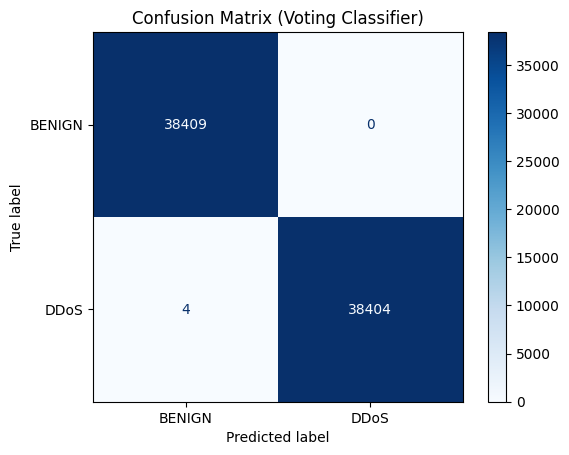

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Voting Classifier)')
plt.show()


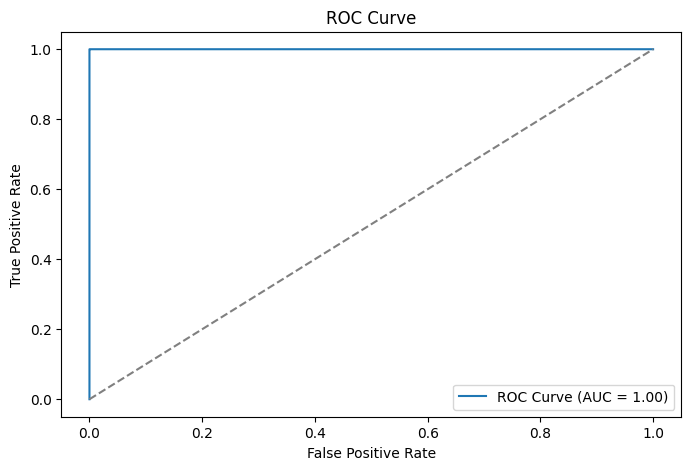

In [77]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for class 1
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
